## Observations and Insights 

In [1]:
#After observing the data, I came to 3 conclusions about this clinical study. First,there is a strong correlation between Mouse Weight and Average Tumor Volume (0.84). The more a mouse weighs
#the larger the volume of the tumor. Second, after analyzing our line plot for Mouse s185 (as well as observing the dataset and the quartile data) Capomulin seems to be very successful
#in treating the mice, as s185's tumor volume decreased over 20(mm3) over the treatment period. Lastly, Capomulin and Ramicane were both tested the most out of any drug, and they both had the lowest
#mean's of Tumor Volume (mm3) and the lowest variances/standard deviations of Tumor Volume (mm3)out of all the drug regimens. This can imply that the data for the mice tested with those drugs is more 
#consistent, meaning that doctors can understand more easily how recipients of those two drugs will react versus the other drug regimens with more spread out results.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop(combined_data[combined_data['Mouse ID'] == "g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df["Mouse ID"].unique())
num_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# clean_df.rename(columns = {'Drug Regimen':'Drug',"Tumor Volume (mm3)": "Tumor"}, inplace = True)

# clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()
group_df = clean_df.groupby(["Drug Regimen"])
mean = group_df["Tumor Volume (mm3)"].mean()
med = group_df["Tumor Volume (mm3)"].median()
var = group_df["Tumor Volume (mm3)"].var()
std = group_df["Tumor Volume (mm3)"].std()
sem = group_df["Tumor Volume (mm3)"].sem()

summary_df = pd.merge(mean, med, how='right', on='Drug Regimen')
summary_df.rename(columns = {'Tumor Volume (mm3)_x':'Mean',"Tumor Volume (mm3)_y": "Median"}, inplace = True)
summary_df["Variance"] = var
summary_df["Standard Deviation"] = std
summary_df["SEM"] = sem
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_two = group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

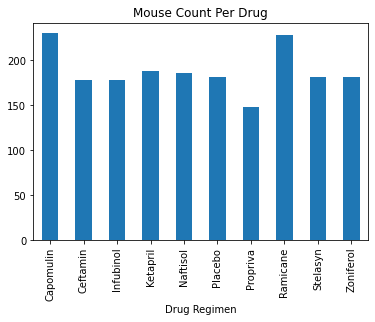

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_df = clean_df.drop_duplicates('Mouse ID')
unique_dfx = clean_df.groupby(["Drug Regimen"])
# unique_dfx = unique_df.groupby(["Drug Regimen"])
bar_df = pd.DataFrame(unique_dfx["Mouse ID"].count())
bar_df.rename(columns = {"Mouse ID": "Mouse Count Per Drug"}, inplace = True)
x_axis = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo',
        'Propriva','Ramicane','Stelasyn', 'Zoniferol']
count = bar_df["Mouse Count Per Drug"]

bar = bar_df.plot.bar(rot=90, subplots=True, legend=False,)

Text(0, 0.5, 'Count')

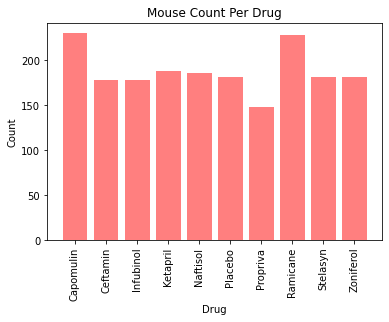

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# plt.bar(x='Drug Regimen', y='Count', rot=0)
plt.bar(x_axis, count, color='r', alpha=0.50, align="center")
plt.xticks(rotation=90)
plt.title("Mouse Count Per Drug")
plt.xlabel("Drug")
plt.ylabel("Count")

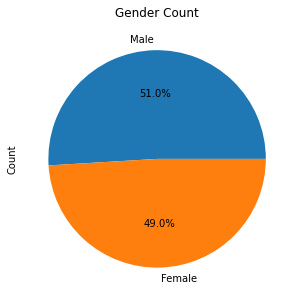

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
malex = len(unique_df.loc[unique_df["Sex"] == "Male"])
femalex = len(unique_df.loc[unique_df["Sex"] == "Female"])

male = len(clean_df.loc[clean_df["Sex"] == "Male"])
female = len(clean_df.loc[clean_df["Sex"] == "Female"])

gender_df = pd.DataFrame({
    "Gender": ["Male", "Female"],
    "Count": [male, female]
})

panda_pie = gender_df.plot.pie(y= "Count", title="Gender Count", legend=False, figsize=(5, 5), autopct='%1.1f%%', labels=['Male','Female'])


Text(0.5, 1.0, 'Gender Count')

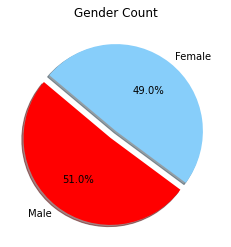

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [male, female]
colors = ["red", "lightskyblue"]
explode = (0.1, 0)

py_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Gender Count")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_df = clean_df.groupby("Mouse ID").last()

capomulin = max_df.loc[max_df["Drug Regimen"] == "Capomulin"]
ramicane = max_df.loc[max_df["Drug Regimen"] == "Ramicane"]
infubinol = max_df.loc[max_df["Drug Regimen"] == "Infubinol"]
ceftamin = max_df.loc[max_df["Drug Regimen"] == "Ceftamin"]

capomulinx = capomulin["Tumor Volume (mm3)"]
ramicanex = ramicane["Tumor Volume (mm3)"]
infubinolx = infubinol["Tumor Volume (mm3)"]
ceftaminx = ceftamin["Tumor Volume (mm3)"]

max_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    
quartiles_cap = capomulinx.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap 
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
# cap_up = capomulin.loc[capomulin["Tumor Volume (mm3)"] > upper_bound_cap]
# cap_low = capomulin.loc[capomulin["Tumor Volume (mm3)"] < lower_bound_cap]
cap_up = capomulinx > upper_bound_cap
cap_low = capomulinx < lower_bound_cap

quartiles_ram = ramicanex.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
# ram_up = ramicane.loc[ramicane["Tumor Volume (mm3)"] > upper_bound_ram]
# ram_low = ramicane.loc[ramicane["Tumor Volume (mm3)"] < lower_bound_ram]
ram_up = ramicanex > upper_bound_ram
ram_low = ramicanex < lower_bound_ram

quartiles_inf = infubinolx.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf 
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
# inf_up = infubinol.loc[infubinol["Tumor Volume (mm3)"] > upper_bound_inf]
# inf_low = infubinol.loc[infubinol["Tumor Volume (mm3)"] < lower_bound_inf]
inf_up = infubinolx > upper_bound_inf
inf_low = infubinolx < lower_bound_inf


quartiles_cef = ceftaminx.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef 
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
# cef_up = ceftamin.loc[ceftamin["Tumor Volume (mm3)"] > upper_bound_cef]
# cef_low = ceftamin.loc[ceftamin["Tumor Volume (mm3)"] < lower_bound_cef]
cef_up = ceftaminx > upper_bound_cef
cef_low = ceftaminx < lower_bound_cef

In [16]:
#Printing the Quartile Data
print("Quartile Data")
print("---------------------------------------")
print(f"Lower quartile for Capomulin is {round(lowerq_cap,2)}")
print(f"Upper quartile for Capomulin is {round(upperq_cap,2)}")
print(f"The Interquartile Range for Capomulin is {round(iqr_cap,2)}")
print(f"Lower bound for Capomulin is {round(lower_bound_cap,2)}")
print(f"Upper bound for Capomulin is {round(upper_bound_cap,2)}")
print("---------------------------------------")
print(f"Lower quartile for Ramicane is {round(lowerq_ram,2)}")
print(f"Upper quartile for Ramicane is {round(upperq_ram,2)}")
print(f"The Interquartile Range for Ramicane is {round(iqr_ram,2)}")
print(f"Lower bound for Ramicane is {round(lower_bound_ram,2)}")
print(f"Upper bound for Ramicane is {round(upper_bound_ram,2)}")
print("---------------------------------------")
print(f"Lower quartile for Infubinol is {round(lowerq_inf,2)}")
print(f"Upper quartile for Infubinol is {round(upperq_inf,2)}")
print(f"The Interquartile Range for Infubinol is {round(iqr_inf,2)}")
print(f"Lower bound for Infubinol is {round(lower_bound_inf,2)}")
print(f"Upper bound for Infubinol is {round(upper_bound_inf,2)}")
print(f"The outlier is Mouse ID: c326")
print("---------------------------------------")
print(f"Lower quartile for Ceftamin is {round(lowerq_cef,2)}")
print(f"Upper quartile for Ceftamin is {round(upperq_cef,2)}")
print(f"The Interquartile Range for Ceftamin is {round(iqr_cef,2)}")
print(f"Lower bound for Ceftamin is {round(lower_bound_cef,2)}")
print(f"Upper bound for Ceftamin is {round(upper_bound_cef,2)}")
print("---------------------------------------")

Quartile Data
---------------------------------------
Lower quartile for Capomulin is 32.38
Upper quartile for Capomulin is 40.16
The Interquartile Range for Capomulin is 7.78
Lower bound for Capomulin is 20.7
Upper bound for Capomulin is 51.83
---------------------------------------
Lower quartile for Ramicane is 31.56
Upper quartile for Ramicane is 40.66
The Interquartile Range for Ramicane is 9.1
Lower bound for Ramicane is 17.91
Upper bound for Ramicane is 54.31
---------------------------------------
Lower quartile for Infubinol is 54.05
Upper quartile for Infubinol is 65.53
The Interquartile Range for Infubinol is 11.48
Lower bound for Infubinol is 36.83
Upper bound for Infubinol is 82.74
The outlier is Mouse ID: c326
---------------------------------------
Lower quartile for Ceftamin is 48.72
Upper quartile for Ceftamin is 64.3
The Interquartile Range for Ceftamin is 15.58
Lower bound for Ceftamin is 25.36
Upper bound for Ceftamin is 87.67
---------------------------------------

<ipython-input-17-f89f8f2bf9c9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


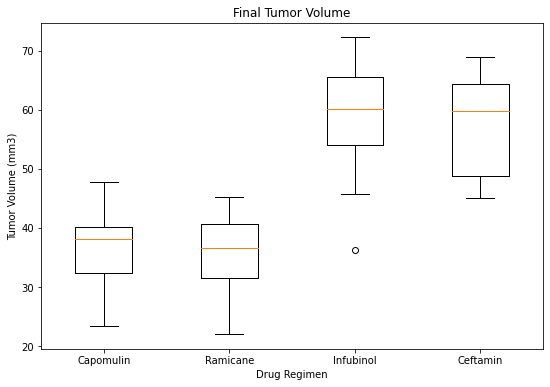

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulinx, ramicanex, infubinolx, ceftaminx]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_title('Final Tumor Volume')
box = ax.boxplot(data)

## Line and Scatter Plots

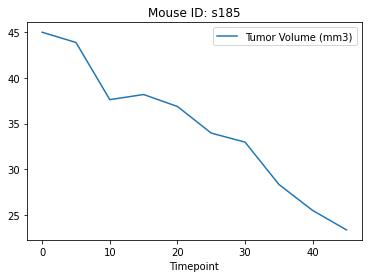

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
line_df = line_df.loc[line_df["Mouse ID"] == "s185"]
line = line_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title="Mouse ID: s185")

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight')

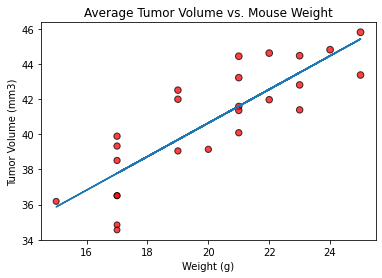

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinz = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
scatter = capomulinz.groupby("Mouse ID").mean()
weight = scatter["Weight (g)"]
tumor = scatter["Tumor Volume (mm3)"]

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(weight, tumor)
py_fit = py_slope * weight + py_int
plt.plot(weight,py_fit,"-")

plt.scatter(weight, tumor, marker="o", facecolors="red", edgecolors="black",
              s=tumor, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Weight and Average Tumor Volume is {round(st.pearsonr(weight, tumor)[0],2)}")

py_slope, py_int, py_r, py_p, py_std_err = st.linregress(weight, tumor)
py_fit = py_slope * weight + py_int

The correlation coefficient between Weight and Average Tumor Volume is 0.84
